Importing libraries

In [1]:
! pip install tensorflow

In [2]:
# Import necessary layers and tools for model creation
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import warnings # Ignore warnings for cleaner output
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPooling2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import seaborn as sns

Loading Dataset

In [3]:
# Directory paths for spiral drawings - training and testing
dir_sp_train = r"C:\Users\Vansh Gupta\Desktop\drawings\spiral\training"
dir_sp_test = r"C:\Users\Vansh Gupta\Desktop\drawings\spiral\testing"

# Directory paths for wave drawings - training and testing
dir_wv_train = r"C:\Users\Vansh Gupta\Desktop\drawings\wave\training"
dir_wv_test = r"C:\Users\Vansh Gupta\Desktop\drawings\wave\testing"

In [4]:
# Initialize an empty list to store file names
Name = []

# Iterate through files in the 'dir_sp_train' directory and collect their names
for file in os.listdir(dir_sp_train):
    # Append each file name to the 'Name' list
    Name += [file]

# Print the list of file names
print(Name)

['healthy', 'parkinson']


In [5]:
# Initialize an empty list to store indices
N = []
for i in range(len(Name)):
    # Create a list of indices from 0 to len(Name)-1
    N += [i]

# Create a dictionary mapping filenames to indices
normal_mapping = dict(zip(Name, N))

# Create a dictionary mapping indices to filenames (reverse mapping)
reverse_mapping = dict(zip(N, Name))

# Define a function to retrieve the filename given an index
def mapper(value):
    return reverse_mapping[value]

In [6]:
# Initialize an empty list to store the dataset for spiral drawings
dataset_sp = []
count = 0

# Iterate through each file in the training directory for spiral drawings
for file in os.listdir(dir_sp_train):
    # Create the full path to the subdirectory
    path = os.path.join(dir_sp_train, file)

    # Iterate through each image file in the subdirectory
    for im in os.listdir(path):
        # Load the image, convert it to an array, resize, and normalize its values
        image = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(100, 100))
        image = img_to_array(image)
        image = image / 255.0

        # Append the image data and its associated label (count) to the dataset_sp list
        dataset_sp.append([image, count])

    # Increment the count for the next category
    count = count + 1

# Initialize an empty list to store the test set for spiral drawings
testset_sp = []
count = 0

# Iterate through each file in the testing directory for spiral drawings
for file in os.listdir(dir_sp_test):
    # Create the full path to the subdirectory
    path = os.path.join(dir_sp_test, file)

    # Iterate through each image file in the subdirectory
    for im in os.listdir(path):
        # Load the image, convert it to an array, resize, and normalize its values
        image = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(100, 100))
        image = img_to_array(image)
        image = image / 255.0

        # Append the image data and its associated label (count) to the testset_sp list
        testset_sp.append([image, count])

    # Increment the count for the next category
    count = count + 1

In [7]:
# Initialize an empty list to store the dataset for wave drawings
dataset_wv = []
count = 0

# Iterate through each file in the training directory for wave drawings
for file in os.listdir(dir_wv_train):
    # Create the full path to the subdirectory
    path = os.path.join(dir_wv_train, file)

    # Iterate through each image file in the subdirectory
    for im in os.listdir(path):
        # Load the image, convert it to an array, resize, and normalize its values
        image = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(100, 100))
        image = img_to_array(image)
        image = image / 255.0

        # Append the image data and its associated label (count) to the dataset_wv list
        dataset_wv.append([image, count])

    # Increment the count for the next category
    count = count + 1

# Initialize an empty list to store the test set for wave drawings
testset_wv = []
count = 0

# Iterate through each file in the testing directory for wave drawings
for file in os.listdir(dir_wv_test):
    # Create the full path to the subdirectory
    path = os.path.join(dir_wv_test, file)

    # Iterate through each image file in the subdirectory
    for im in os.listdir(path):
        # Load the image, convert it to an array, resize, and normalize its values
        image = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(100, 100))
        image = img_to_array(image)
        image = image / 255.0

        # Append the image data and its associated label (count) to the testset_wv list
        testset_wv.append([image, count])

    # Increment the count for the next category
    count = count + 1

In [8]:
# Unzip the dataset for spiral drawings: separating image data and labels for training
data_sp, labels_sp0 = zip(*dataset_sp)

# Unzip the testset for spiral drawings: separating test image data and test labels
test_sp, tlabels_sp0 = zip(*testset_sp)

# Unzip the dataset for wave drawings: separating image data and labels for training
data_wv, labels_wv0 = zip(*dataset_wv)

# Unzip the testset for wave drawings: separating test image data and test labels
test_wv, tlabels_wv0 = zip(*testset_wv)

In [9]:
# Convert labels for spiral drawings' training set to categorical format
labels_sp1 = to_categorical(labels_sp0)
# Convert image data for spiral drawings' training set to NumPy array
data_sp = np.array(data_sp)
# Assign categorical labels for spiral drawings' training set to labels_sp
labels_sp = np.array(labels_sp1)

# Convert labels for spiral drawings' test set to categorical format
tlabels_sp1 = to_categorical(tlabels_sp0)
# Convert test image data for spiral drawings' test set to NumPy array
test_sp = np.array(test_sp)
# Assign categorical labels for spiral drawings' test set to tlabels_sp
tlabels_sp = np.array(tlabels_sp1)

In [10]:
# Convert labels for wave drawings' training set to categorical format
labels_wv1 = to_categorical(labels_wv0)
# Convert image data for wave drawings' training set to NumPy array
data_wv = np.array(data_wv)
# Assign categorical labels for wave drawings' training set to labels_wv
labels_wv = np.array(labels_wv1)

# Convert labels for wave drawings' test set to categorical format
tlabels_wv1 = to_categorical(tlabels_wv0)
# Convert test image data for wave drawings' test set to NumPy array
test_wv = np.array(test_wv)
# Assign categorical labels for wave drawings' test set to tlabels_wv
tlabels_wv = np.array(tlabels_wv1)

In [11]:
# Splitting the data for spiral drawings into training and testing sets
trainx_sp, testx_sp, trainy_sp, testy_sp = train_test_split(data_sp, labels_sp, test_size=0.2, random_state=44)

# Splitting the data for wave drawings into training and testing sets
trainx_wv, testx_wv, trainy_wv, testy_wv = train_test_split(data_wv, labels_wv, test_size=0.2, random_state=44)

In [12]:
print(trainx_sp.shape)  # Shape of training data for spiral drawings
print(testx_sp.shape)   # Shape of testing data for spiral drawings
print(trainy_wv.shape)  # Shape of training labels for wave drawings
print(testy_wv.shape)   # Shape of testing labels for wave drawings

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [13]:
# Define a Sequential model
model = Sequential()

# Add a convolutional layer with 32 filters and a kernel size of (5,5), using ReLU activation and defining input shape
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))  # Add max pooling layer

# Add a second convolutional layer with 64 filters and a kernel size of (5,5), using ReLU activation
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))  # Add max pooling layer

model.add(Flatten())  # Flatten the output to feed into fully connected layers

# Add a fully connected layer with 64 units and ReLU activation
model.add(Dense(units=64, activation="relu"))

# Add the output layer with 2 units (assuming a binary classification) and softmax activation
model.add(Dense(units=2, activation="softmax"))

# Print the summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 48, 48, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 64)               

In [14]:
# Compile the model with specified parameters for training
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [15]:
batch_size = 32  # Define the batch size for training

print("Start Training", '\n')

# Train the model on the spiral drawings data
hist_0 = model.fit(trainx_sp, trainy_sp, batch_size=batch_size, epochs=70, validation_data=(testx_sp, testy_sp))

# Train the model on the wave drawings data
hist_1 = model.fit(trainx_wv, trainy_wv, batch_size=batch_size, epochs=80, validation_data=(testx_wv, testy_wv))

print("Training End", '\n')

# Save the trained model to a file
model.save("CNN_Model.h5")

Start Training 

Epoch 1/70


2/2 [==============================] - 7s 1s/step - loss: 2.6173 - accuracy: 0.4912 - val_loss: 1.3508 - val_accuracy: 0.4000
Epoch 2/70
2/2 [==============================] - 1s 325ms/step - loss: 1.0497 - accuracy: 0.4737 - val_loss: 0.6989 - val_accuracy: 0.6000
Epoch 3/70
2/2 [==============================] - 1s 357ms/step - loss: 0.7830 - accuracy: 0.4737 - val_loss: 0.6764 - val_accuracy: 0.6000
Epoch 4/70
2/2 [==============================] - 1s 301ms/step - loss: 0.7028 - accuracy: 0.4737 - val_loss: 0.6922 - val_accuracy: 0.6000
Epoch 5/70
2/2 [==============================] - 1s 310ms/step - loss: 0.6979 - accuracy: 0.4737 - val_loss: 0.6956 - val_accuracy: 0.4000
Epoch 6/70
2/2 [==============================] - 1s 301ms/step - loss: 0.6919 - accuracy: 0.5263 - val_loss: 0.7031 - val_accuracy: 0.4000
Epoch 7/70
2/2 [==============================] - 1s 298ms/step - loss: 0.6951 - accuracy: 0.5263 - val_loss: 0.6981 - val_accuracy: 0.4000
Epoc

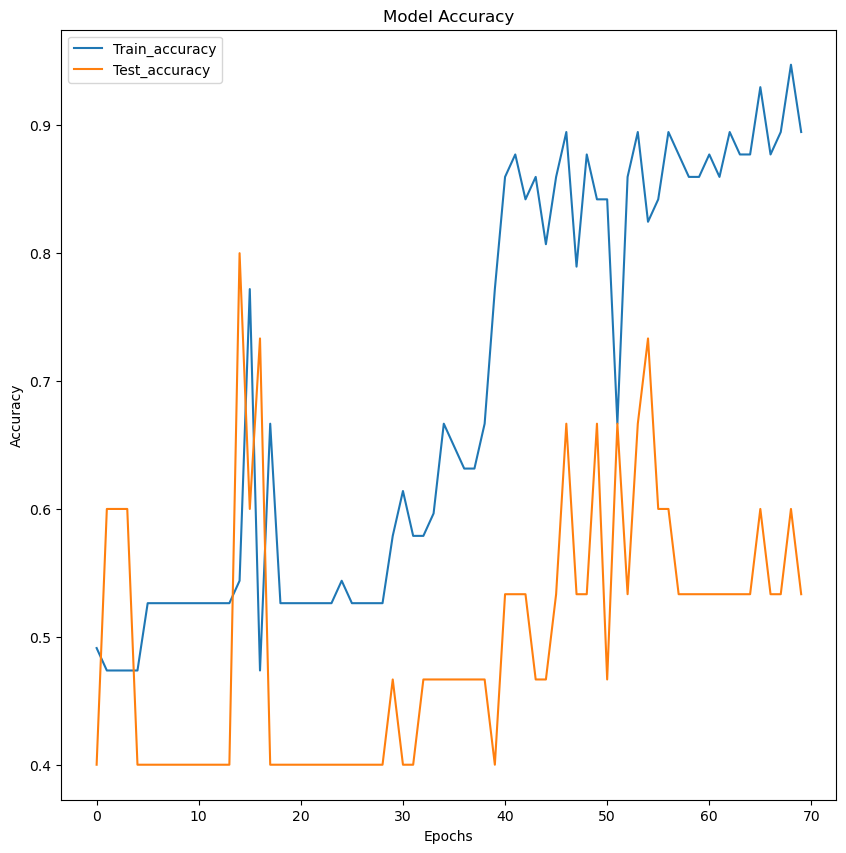

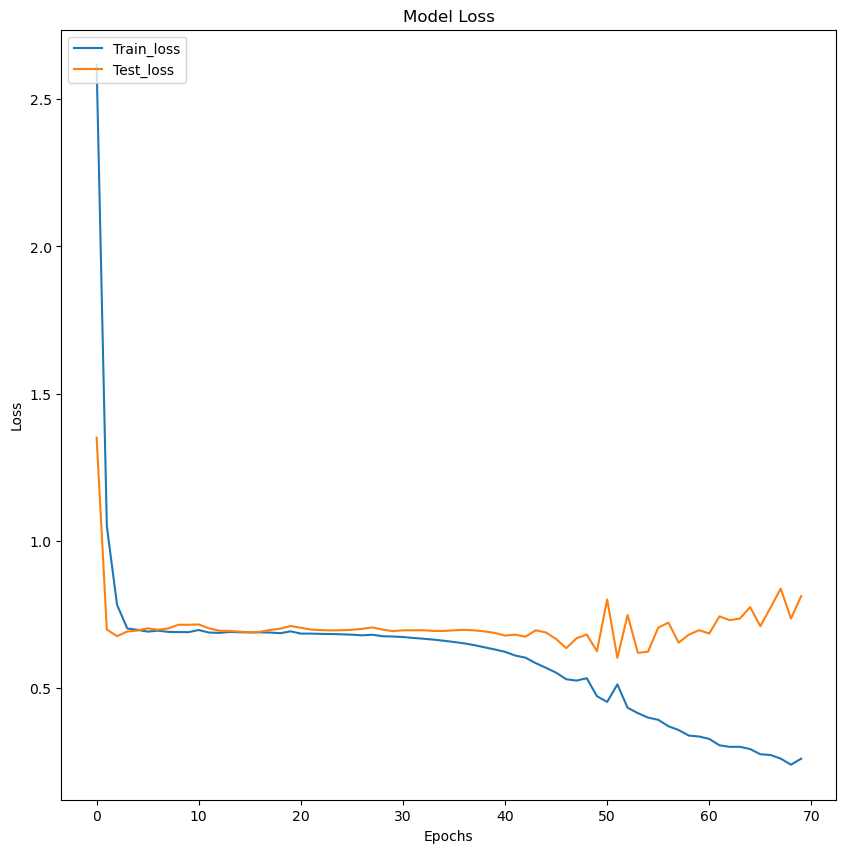

In [16]:
# Plotting model accuracy for train and test sets
figure = plt.figure(figsize=(10, 10))
plt.plot(hist_0.history['accuracy'], label='Train_accuracy')
plt.plot(hist_0.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

# Plotting model loss for train and test sets
figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist_0.history['loss'], label='Train_loss')
plt.plot(hist_0.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

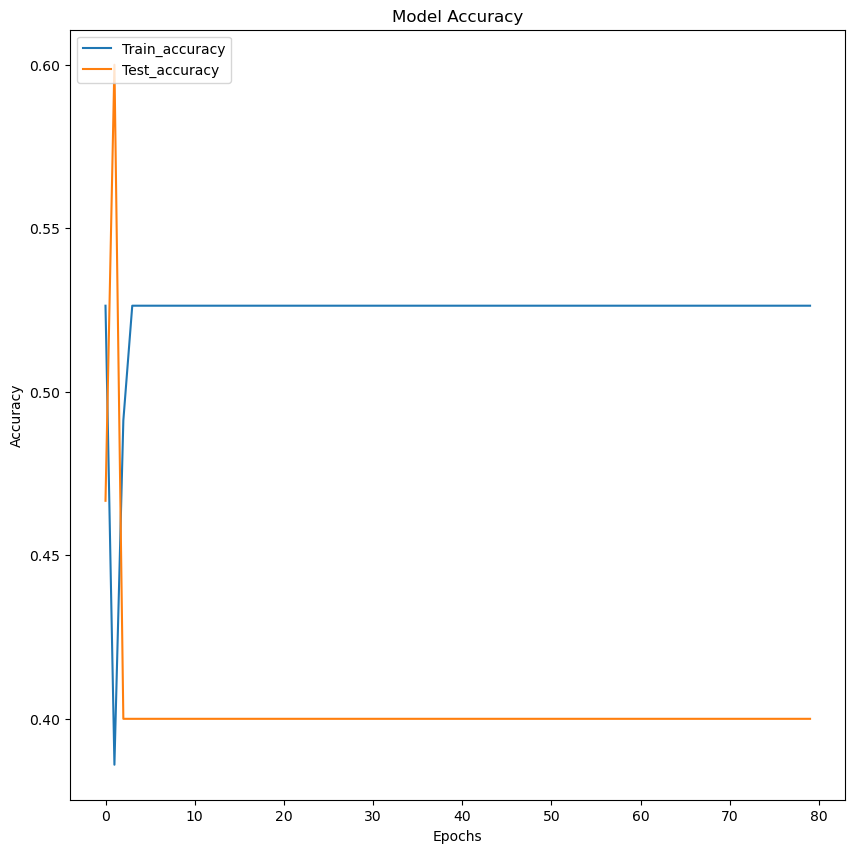

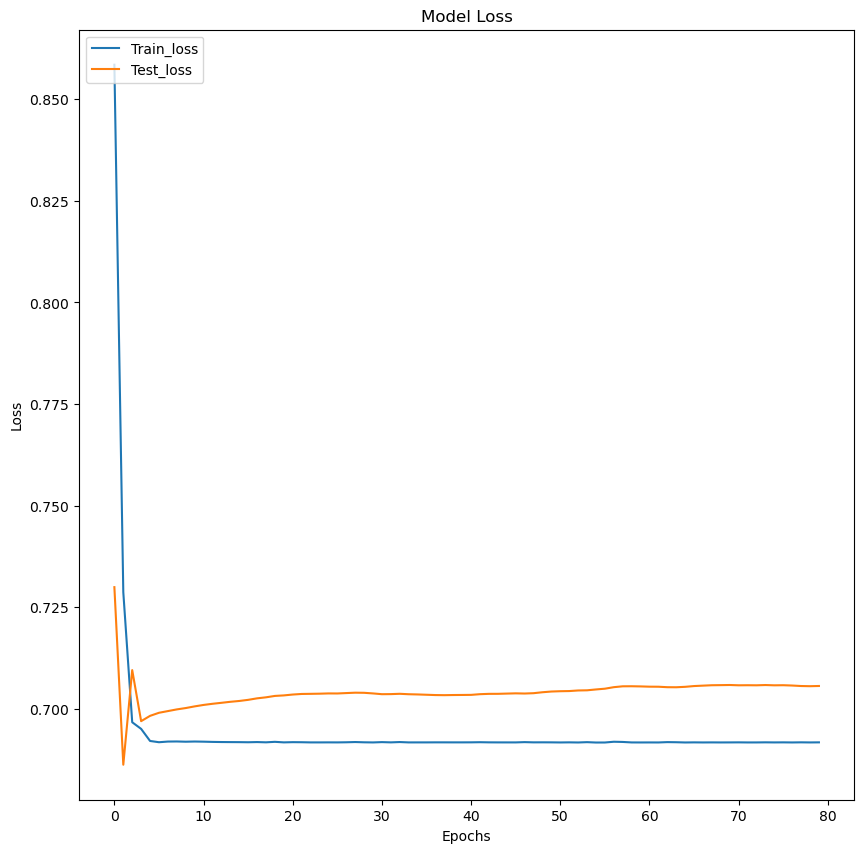

In [17]:
# Plotting model accuracy for train and test sets for wave drawings
figure = plt.figure(figsize=(10, 10))
plt.plot(hist_1.history['accuracy'], label='Train_accuracy')
plt.plot(hist_1.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

# Plotting model loss for train and test sets for wave drawings
figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist_1.history['loss'], label='Train_loss')
plt.plot(hist_1.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

In [18]:
# Initialize an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    horizontal_flip=True,       # Randomly flips images horizontally
    vertical_flip=True,         # Randomly flips images vertically
    rotation_range=20,          # Randomly rotates images in the range of -20 to +20 degrees
    zoom_range=0.2,             # Randomly zooms into images by a factor of up to 0.2
    width_shift_range=0.2,      # Randomly shifts the width of images by a maximum of 20% of total width
    height_shift_range=0.2,     # Randomly shifts the height of images by a maximum of 20% of total height
    shear_range=0.1,            # Applies shear-based transformations to images
    fill_mode="nearest"         # Fills in newly created pixels using the nearest existing pixel values
)

In [19]:
# Initialize the first pre-trained DenseNet201 model without the top (fully connected) layers
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100, 100, 3), include_top=False, weights='imagenet', pooling='avg')
# Set the layers of this model as non-trainable
pretrained_model3.trainable = False

# Initialize the second pre-trained DenseNet201 model without the top (fully connected) layers
pretrained_model4 = tf.keras.applications.DenseNet201(input_shape=(100, 100, 3), include_top=False, weights='imagenet', pooling='avg')
# Set the layers of this model as non-trainable
pretrained_model4.trainable = False

In [20]:
# For model3: Add additional dense layers on top of pretrained_model3
inputs3 = pretrained_model3.input  # Input layer of pretrained_model3
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)  # Additional dense layer
outputs3 = tf.keras.layers.Dense(2, activation='softmax')(x3)  # Output layer for binary classification
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)  # Define the model

# For model4: Add additional dense layers on top of pretrained_model4
inputs4 = pretrained_model4.input  # Input layer of pretrained_model4
x4 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model4.output)  # Additional dense layer
outputs4 = tf.keras.layers.Dense(2, activation='softmax')(x4)  # Output layer for binary classification
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)  # Define the model

In [21]:
model3.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
sp_3=model3.fit(datagen.flow (trainx_sp, trainy_sp, batch_size=32), validation_data=(testx_sp, testy_sp), epochs=70)
wv_4=model4.fit(datagen.flow (trainx_wv, trainy_wv, batch_size=32), validation_data=(testx_wv, testy_wv), epochs=80)

Epoch 1/70
2/2 [==============================] - 40s 11s/step - loss: 1.0839 - accuracy: 0.5614 - val_loss: 0.7624 - val_accuracy: 0.6000
Epoch 2/70
2/2 [==============================] - 2s 1s/step - loss: 0.8115 - accuracy: 0.5263 - val_loss: 1.2889 - val_accuracy: 0.5333
Epoch 3/70
2/2 [==============================] - 2s 1s/step - loss: 0.9038 - accuracy: 0.5614 - val_loss: 0.9020 - val_accuracy: 0.5333
Epoch 4/70
2/2 [==============================] - 2s 1s/step - loss: 0.6450 - accuracy: 0.6491 - val_loss: 0.5241 - val_accuracy: 0.7333
Epoch 5/70
2/2 [==============================] - 3s 2s/step - loss: 0.6142 - accuracy: 0.6316 - val_loss: 0.5811 - val_accuracy: 0.6667
Epoch 6/70
2/2 [==============================] - 2s 2s/step - loss: 0.5930 - accuracy: 0.6316 - val_loss: 0.4716 - val_accuracy: 0.7333
Epoch 7/70
2/2 [==============================] - 3s 1s/step - loss: 0.6198 - accuracy: 0.6316 - val_loss: 0.5886 - val_accuracy: 0.6667
Epoch 8/70
2/2 [=======================

In [23]:
# Predict using model3 on spiral test data (testx_sp)
y_pred_sp = model3.predict(testx_sp)

# Get the predicted classes by taking the index of the maximum value along axis 1
pred_sp = np.argmax(y_pred_sp, axis=1)

# Get the ground truth classes by taking the index of the maximum value along axis 1 in testy_sp
ground_sp = np.argmax(testy_sp, axis=1)

# Print the classification report for the predictions on spiral test data
print(classification_report(ground_sp, pred_sp))

1/1 [==============================] - 8s 8s/step
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.89      0.89      0.89         9

    accuracy                           0.87        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.87      0.87      0.87        15



In [24]:
# Predict using model3 on wave test data (testx_wv)
y_pred_wv = model3.predict(testx_wv)

# Get the predicted classes by taking the index of the maximum value along axis 1
pred_wv = np.argmax(y_pred_wv, axis=1)

# Get the ground truth classes by taking the index of the maximum value along axis 1 in testy_wv
ground_wv = np.argmax(testy_wv, axis=1)

# Print the classification report for the predictions on wave test data
print(classification_report(ground_wv, pred_wv))

1/1 [==============================] - 0s 417ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.60      1.00      0.75         9

    accuracy                           0.60        15
   macro avg       0.30      0.50      0.37        15
weighted avg       0.36      0.60      0.45        15



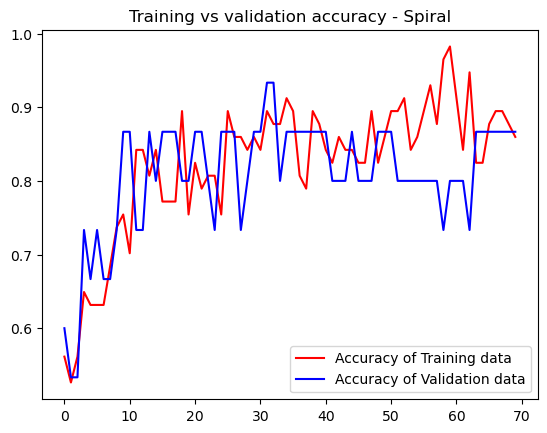

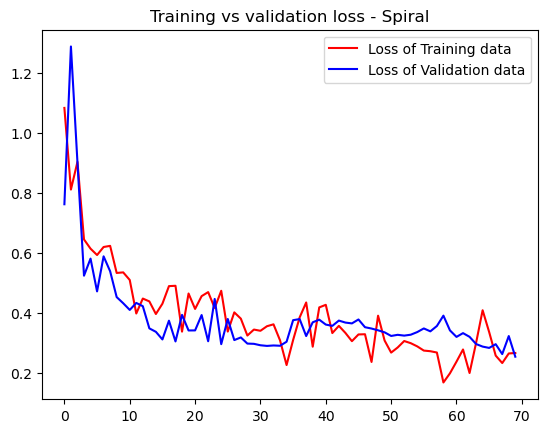

In [25]:
# Extract training history metrics for accuracy and loss from sp_3 (model3's training history on spiral data)
get_acc3 = sp_3.history['accuracy']
value_acc3 = sp_3.history['val_accuracy']
get_loss3 = sp_3.history['loss']
validation_loss3 = sp_3.history['val_loss']

# Create a range of epochs for plotting
epochs3 = range(len(get_acc3))

# Plotting accuracy for training and validation data on spiral
plt.plot(epochs3, get_acc3, 'r', label='Accuracy of Training data')
plt.plot(epochs3, value_acc3, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Spiral')
plt.legend(loc=0)
plt.show()

# Plotting loss for training and validation data on spiral
plt.plot(epochs3, get_loss3, 'r', label='Loss of Training data')
plt.plot(epochs3, validation_loss3, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Spiral')
plt.legend(loc=0)
plt.show()

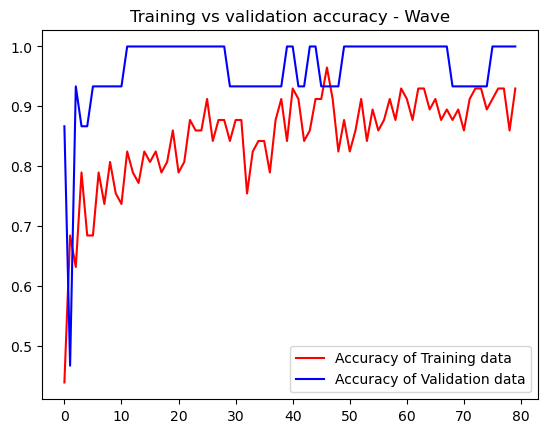

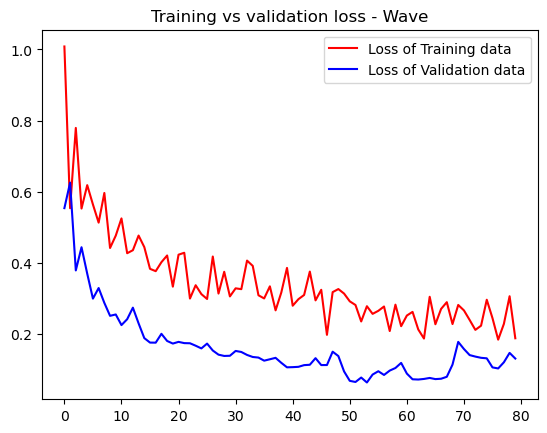

In [26]:
# Extract training history metrics for accuracy and loss from wv_4 (model4's training history on wave data)
get_acc4 = wv_4.history['accuracy']
value_acc4 = wv_4.history['val_accuracy']
get_loss4 = wv_4.history['loss']
validation_loss4 = wv_4.history['val_loss']

# Create a range of epochs for plotting
epochs4 = range(len(get_acc4))

# Plotting accuracy for training and validation data on wave
plt.plot(epochs4, get_acc4, 'r', label='Accuracy of Training data')
plt.plot(epochs4, value_acc4, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy - Wave')
plt.legend(loc=0)
plt.show()

# Plotting loss for training and validation data on wave
plt.plot(epochs4, get_loss4, 'r', label='Loss of Training data')
plt.plot(epochs4, validation_loss4, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss - Wave')
plt.legend(loc=0)
plt.show()

In [39]:
# Loading an image from the specified path and resizing it to the target size
img = load_img(r"C:\Users\Vansh Gupta\Desktop\spiral\training\healthy\V02HE02.png", target_size=(100, 100))

In [40]:
image=load_img(r"C:\Users\Vansh Gupta\Desktop\spiral\training\healthy\V02HE02.png", target_size=(100, 100))
image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model3.predict(prediction_image)
value= np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 156ms/step
Prediction is healthy.


In [29]:
# Loading an image from the specified path and resizing it to the target size
img = load_img(r"C:\Users\Vansh Gupta\Desktop\drawings\wave\testing\parkinson\V01PO01.png", target_size=(100, 100))

In [30]:
image=load_img(r"C:\Users\Vansh Gupta\Desktop\drawings\wave\testing\parkinson\V01PO01.png", target_size=(100, 100))
image=img_to_array(image)
image=image/255.0
prediction_image=np.array(image)
prediction_image=np.expand_dims(image, axis=0)

prediction=model3.predict(prediction_image)
value= np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 172ms/step
Prediction is parkinson.


In [31]:
print(test_sp.shape)  # Prints the shape of the test_sp data

# Predicting using model3 on test_sp data
prediction_sp = model3.predict(test_sp)
print(prediction_sp.shape)  # Prints the shape of the predictions made on test_sp data

(30, 100, 100, 3)
1/1 [==============================] - 1s 954ms/step
(30, 2)


In [32]:
# Initializing an empty list to store predicted labels
PRED_sp = []

# Looping through each prediction and extracting the predicted class index
for item in prediction_sp:
    value_sp = np.argmax(item)
    PRED_sp.append(value_sp)

# Obtaining the ground truth labels from tlabels_sp0

# Calculating accuracy by comparing ground truth labels (ANS_sp) with predicted labels (PRED_sp)
ANS_sp=tlabels_sp0
accuracy_sp=accuracy_score(ANS_sp, PRED_sp)
print(accuracy_sp)     # Prints the accuracy score for the predictions made on test_sp data

0.8


In [35]:
print(test_wv.shape)  # Prints the shape of the test_wv data

# Predicting using model4 on test_wv data
prediction_wv = model4.predict(test_wv)
print(prediction_wv.shape)  # Prints the shape of the predictions made on test_wv data

# Initializing an empty list to store predicted labels
PRED_wv = []

# Looping through each prediction and extracting the predicted class index
for item in prediction_wv:
    value_wv = np.argmax(item)
    PRED_wv.append(value_wv)

# Obtaining the ground truth labels from tlabels_wv0

# Calculating accuracy by comparing ground truth labels (ANS_wv) with predicted labels (PRED_wv)
ANS_wv=tlabels_wv0
accuracy_wv=accuracy_score(ANS_wv,PRED_wv)
print(accuracy_wv)   # Prints the accuracy score for the predictions made on test_wv data

(30, 100, 100, 3)
1/1 [==============================] - 7s 7s/step
(30, 2)
0.8666666666666667
